--- ADF Test Results for: Internal_Index (LEVELS (Forced)) ---
ADF Statistic: -5.4290
p-value: 0.0000
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: External_Index (LEVELS (Forced)) ---
ADF Statistic: -3.1511
p-value: 0.0230
Result: STATIONARY
----------------------------------------
--- ADF Test Results for: Panic_Index (LEVELS (Forced)) ---
ADF Statistic: -4.6727
p-value: 0.0001
Result: STATIONARY
----------------------------------------
events_adf_test.csv generated at: processed_data/sentiment/validation/
events_vif_test.csv generated at: processed_data/sentiment/validation/

--- Multicollinearity report (VIF) ---
         Variable       VIF
3     Panic_Index  2.263871
1  Internal_Index  1.838236
2  External_Index  1.395886

--- EVENT 2023-02-06 DIAGNOSIS ---
Internal (Z-Score): 0.05
External (Z-Score): -0.44
Panic/Surprise (Z-Score): 1.90
Dominant driver: Hybrid / Market Noise

Verdicts exported to: processed_data/sentiment/events/verdicts/20

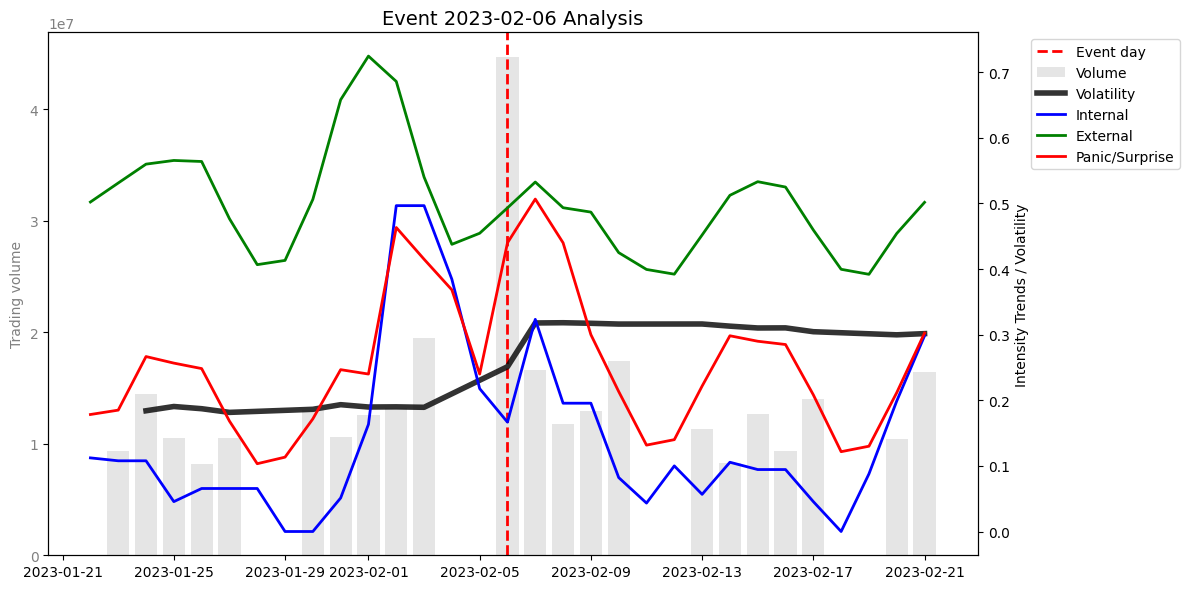


--- EVENT 2022-06-22 DIAGNOSIS ---
Internal (Z-Score): 3.19
External (Z-Score): -0.29
Panic/Surprise (Z-Score): 3.66
Dominant driver: INTERNAL (Corporate Event)

Verdicts exported to: processed_data/sentiment/events/verdicts/2022-06-22_event_verdicts.csv


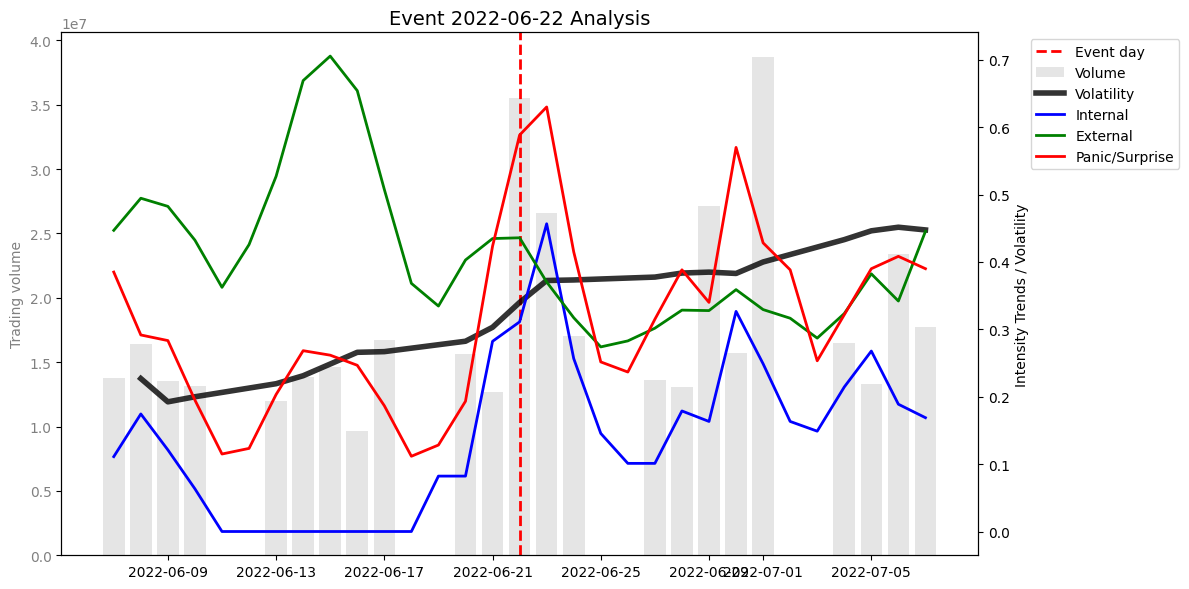


--- EVENT 2022-03-22 DIAGNOSIS ---
Internal (Z-Score): 0.54
External (Z-Score): 0.99
Panic/Surprise (Z-Score): 2.52
Dominant driver: EXTERNAL (Market/Macro Driver)

Verdicts exported to: processed_data/sentiment/events/verdicts/2022-03-22_event_verdicts.csv


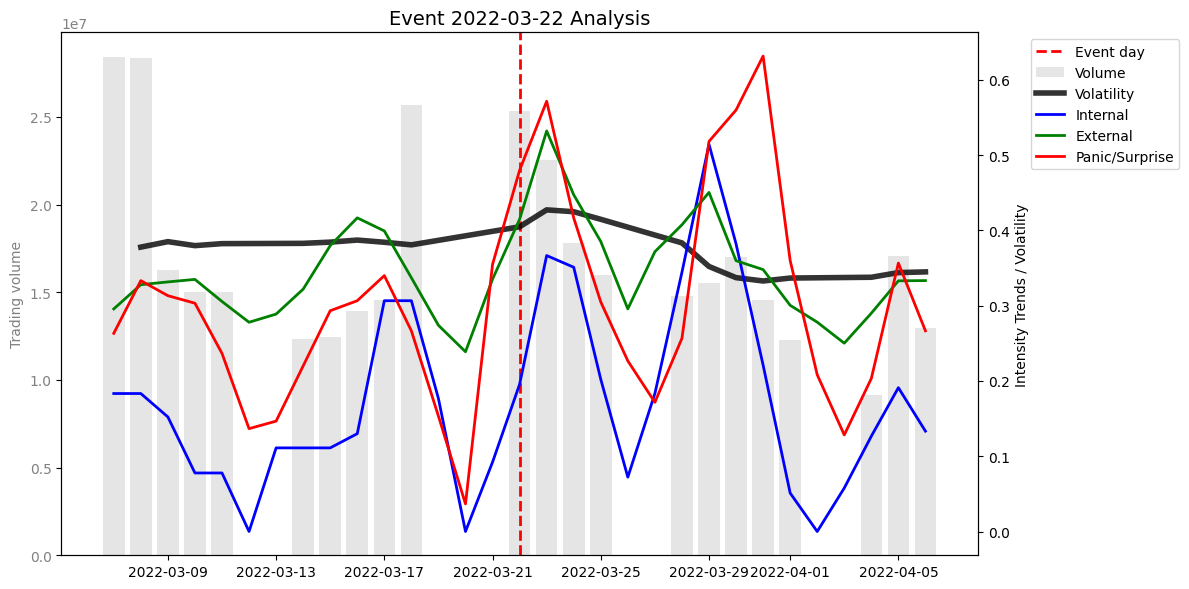


--- EVENT 2022-06-20 DIAGNOSIS ---
Internal (Z-Score): 0.66
External (Z-Score): -0.60
Panic/Surprise (Z-Score): -0.42
Dominant driver: Hybrid / Market Noise

Verdicts exported to: processed_data/sentiment/events/verdicts/2022-06-20_event_verdicts.csv


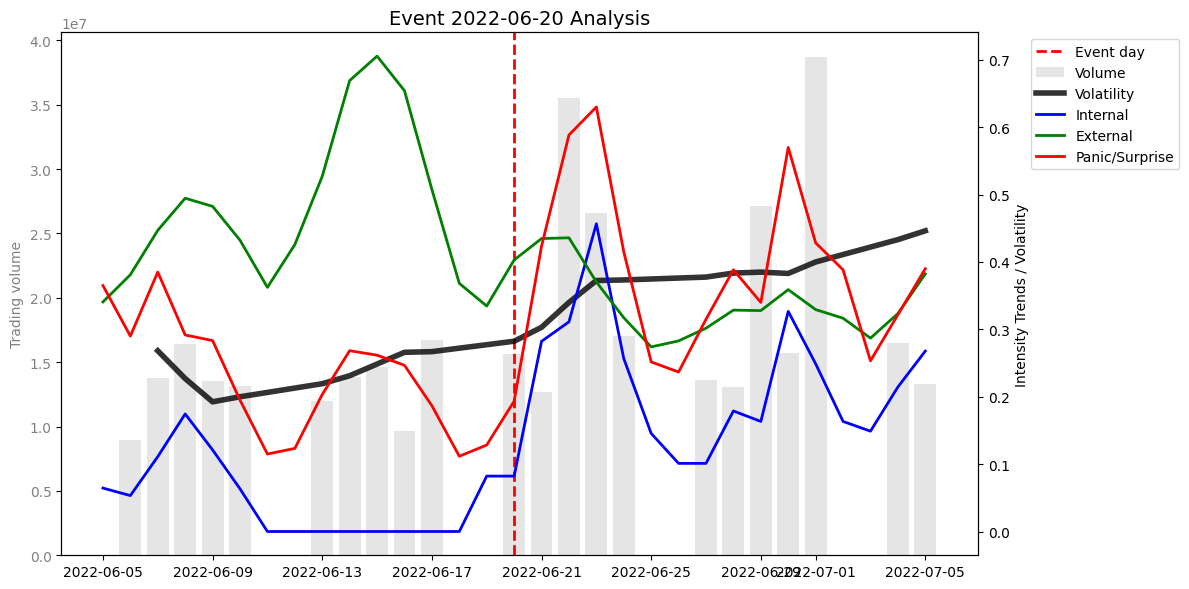


--- EVENT 2022-11-01 DIAGNOSIS ---
Internal (Z-Score): 1.76
External (Z-Score): -0.15
Panic/Surprise (Z-Score): 1.61
Dominant driver: INTERNAL (Potential/Likely)

Verdicts exported to: processed_data/sentiment/events/verdicts/2022-11-01_event_verdicts.csv


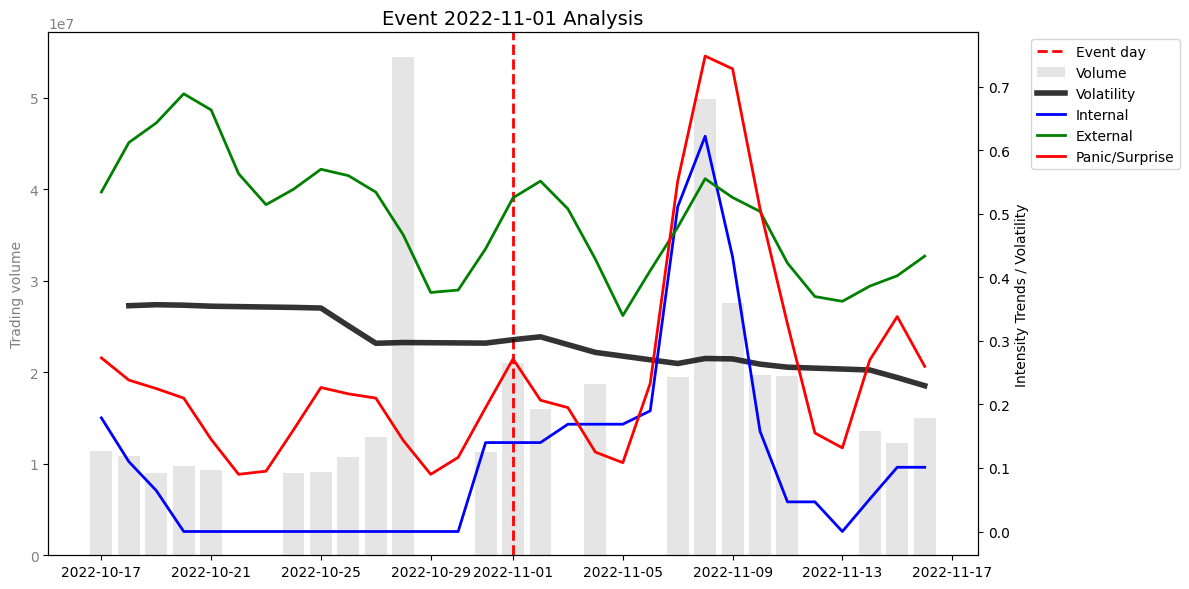


--- EVENT 2021-05-07 DIAGNOSIS ---
Internal (Z-Score): 2.65
External (Z-Score): 1.14
Panic/Surprise (Z-Score): 2.78
Dominant driver: INTERNAL (Corporate Event)

Verdicts exported to: processed_data/sentiment/events/verdicts/2021-05-07_event_verdicts.csv


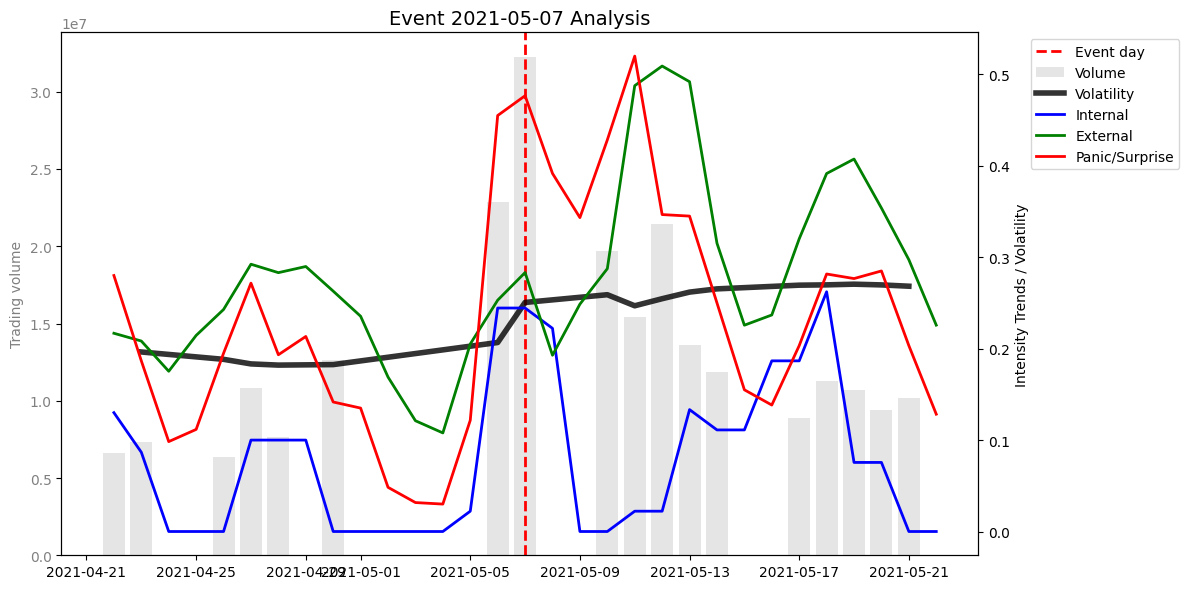


--- EVENT 2022-03-07 DIAGNOSIS ---
Internal (Z-Score): 0.28
External (Z-Score): -0.62
Panic/Surprise (Z-Score): -0.25
Dominant driver: Hybrid / Market Noise

Verdicts exported to: processed_data/sentiment/events/verdicts/2022-03-07_event_verdicts.csv


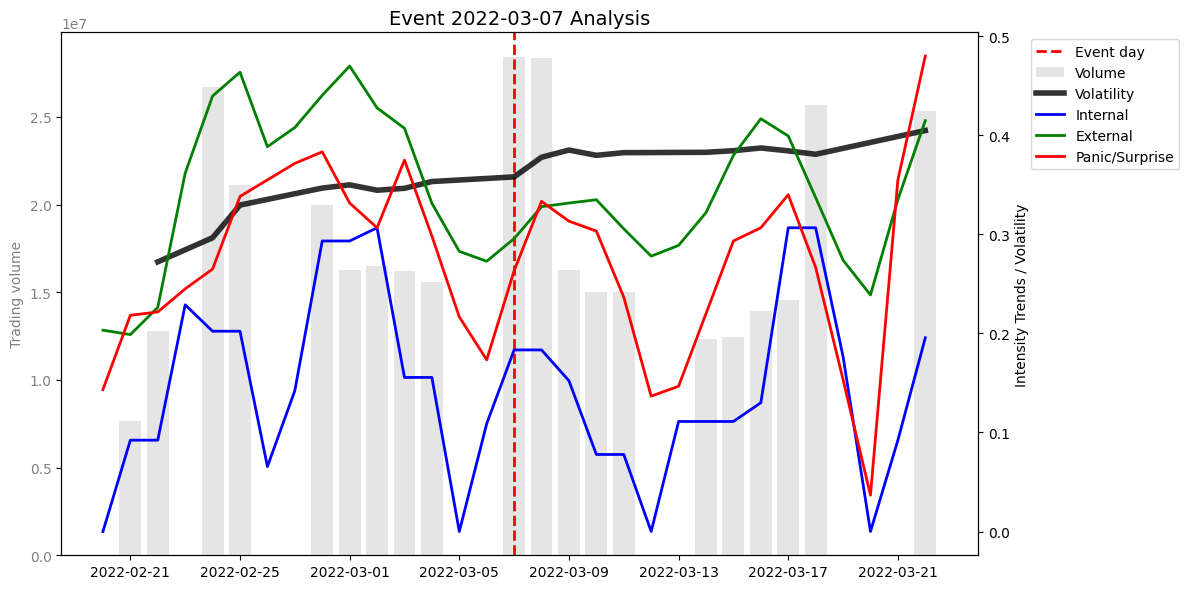


--- Regression summary (R-squared: 0.03) ---
Internal_Index: 55.66% contribution to variance
External_Index: 6.20% contribution to variance
Panic_Index: 38.14% contribution to variance


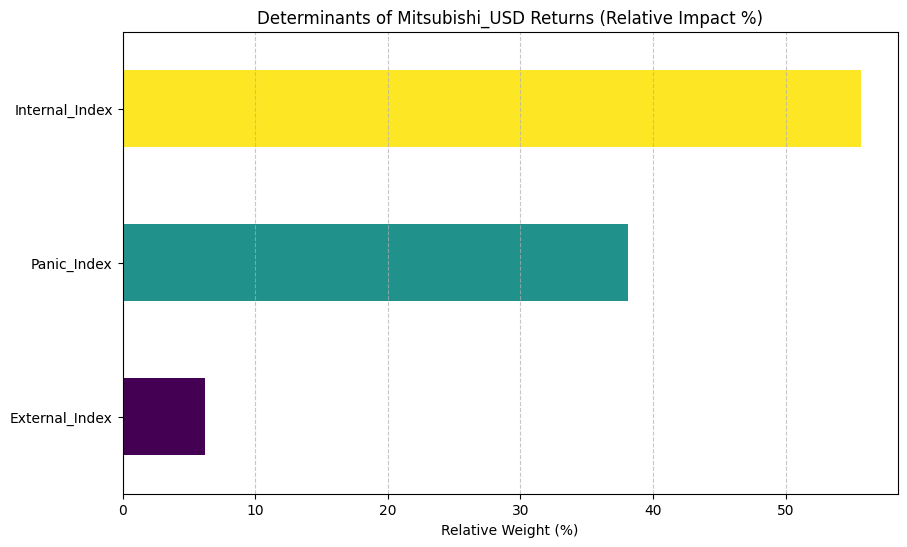

events_ols_results.csv generated at: processed_data/sentiment/model_results/
Graph generated at: plots/sentiment/events
                            OLS Regression Results                            
Dep. Variable:         Mitsubishi_USD   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.292
Date:                Thu, 26 Feb 2026   Prob (F-statistic):              0.281
Time:                        17:09:16   Log-Likelihood:                 295.61
No. Observations:                 120   AIC:                            -583.2
Df Residuals:                     116   BIC:                            -572.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
# MakroMetriks Insights · Victor Valle Solar
# github.com/vivaso86/MakroMetriks-Insights

import pandas as pd
from pytrends.request import TrendReq
import time
import random
import importlib
import src.alternative_data as alt
import src.analytics_engine as ana
import src.excel_formatting as ef
importlib.reload(ef)
importlib.reload(alt)
importlib.reload(ana)

#Selected OLS error dates
ols_errors_top7 = {
    "2023-02-06": 0.067622,
    "2022-06-22": 0.063127,
    "2022-03-22": 0.045760,
    "2022-06-20": 0.044807,
    "2022-11-01": 0.044487,
    "2021-05-07": 0.040835,
    "2022-03-07": 0.040714
}
#Keywords and trends config
pytrends_connection = TrendReq(hl='ja-JP', tz=540)
jp_int_kw = ["8058", "三菱商事 決算", "三菱商事 配当"]
jp_ext_kw = ["ウクライナ 情勢", "天然ガス", "インフレ", "円安", "利上げ"]
jp_panic_kw = ["三菱商事 株価 掲示板", "三菱商事 株価"]

# # #Keyword and vol donwloader (Only uncomment if dataset required)
# internal_meter = alt.trend_extractor(ols_errors_top7,pytrends_connection,jp_int_kw,"JP",1, "jp_int_kw") 
# external_meter = alt.trend_extractor(ols_errors_top7,pytrends_connection,jp_ext_kw,"JP",1, "jp_ext_kw")
# panic_meter = alt.trend_extractor(ols_errors_top7,pytrends_connection,jp_panic_kw,"JP",1, "jp_panic_kw")
# volume = alt.vol_volatility_extractor("8058.T", "2021-03-21", "2023-02-22")

#Load keywords and vol datasets
path = f"processed_data/sentiment"

internal_data = pd.read_csv(f"{path}/events/jp_int_kw.csv")
external_data = pd.read_csv(f"{path}/events/jp_ext_kw.csv")
panic_data = pd.read_csv(f"{path}/events/jp_panic_kw.csv")
csv_volume = pd.read_csv(f"{path}/events/vol_volat.csv")

#Merge trends and adf test
alt.clean_and_index_keyw(internal_data, external_data, panic_data)
merged_trends = pd.read_csv(f"{path}/trends_merged.csv")

ana.check_adf(merged_trends, "events", "sentiment")
ana.check_vif(merged_trends, "events", "sentiment")

#Vol-Volat-Trends graph
alt.vol_volatility_trends_graph(csv_volume, merged_trends, ols_errors_top7)

#OLS test
data_raw = pd.read_csv(f"{path}/dataset_tickers.csv")
data_fx = ana.prepare_market_data(data_raw)
merged_trends = ana.prepare_market_data(merged_trends)

merged_trends['Internal_Index'] = merged_trends['Internal_Index'].shift(2)
merged_trends['External_Index'] = merged_trends['External_Index'].shift(6)

ana.check_ols(data_fx, merged_trends, "Mitsubishi_USD", "events")

alt.generate_trends_report()

In [30]:
import pandas as pd
from pytrends.request import TrendReq
import time
import random
importlib.reload(alt)

#Data download for full OLS regression
periods = [
    "2021-03-01 2021-06-30", "2021-07-01 2021-12-31",
    "2022-01-01 2022-06-30", "2022-07-01 2022-12-31",
    "2023-01-01 2023-03-31"
]

# #If datasets are needed, uncomment the following code
# print("Downloading Internal_Index Data...")
# df_internal_raw = alt.download_trend_ols(["8058", "三菱商事 決算", "三菱商事 配当"], periods, "jp_int_kw")
# print("Downloading External_Index Data...")
# df_panic_raw = alt.download_trend_ols(["ウクライナ 情勢", "天然ガス", "インフレ", "円安", "利上げ"], periods, "jp_ext_kw")
# print("Downloading Panic_Index Data...")
# df_panic_raw = alt.download_trend_ols(["三菱商事 株価 掲示板", "三菱商事 株価"], periods, "jp_panic_kw")

ols_path = "processed_data/sentiment/final_ols/trends"
df_clean = alt.clean_trends_dataset(f'{ols_path}/jp_int_kw_ols.csv', f'{ols_path}/jp_ext_kw_ols.csv', f'{ols_path}/jp_panic_kw_ols.csv')
#df_clean = alt.clean_trends_dataset(f'{ols_path}/df_int.csv', f'{ols_path}/df_ext.csv', f'{ols_path}/df_panic.csv')
print("Dataset cleaned and ready for OLS test:")

Dataset cleaned and ready for OLS test:
